In [2]:
from sklearn.preprocessing import LabelEncoder## 标签编码器
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
#数据的加载

In [3]:
data=pd.read_excel("./附件.xlsx")
data

,编号,母亲年龄,婚姻状况,教育程度,妊娠时间（周数）,分娩方式,CBTS,EPDS,HADS,婴儿行为特征,...,整晚睡眠时间（时：分：秒）,睡醒次数,入睡方式,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,1,34,2,5,37.0,1,3,13,9,中等型,...,10:00:00,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,33,2,5,42.0,1,0,0,3,安静型,...,11:00:00,0.0,4.0,NaN,补充说明（数值含义）,NaN,NaN,NaN,NaN,NaN
2,3,37,2,5,41.0,1,4,8,9,安静型,...,12:00:00,1.0,2.0,NaN,数值,婚姻状况,教育程度,分娩方式,婴儿性别,入睡方式
3,4,31,2,5,37.5,1,6,16,13,安静型,...,11:00:00,2.0,1.0,NaN,1,未婚,小学,自然分娩,男性,哄睡法：通过轻声哄唤、摇晃、拍打等方式，使婴儿感到安全和舒适，进而入睡。
4,5,36,1,5,40.0,1,1,3,3,中等型,...,10:30:00,1.0,4.0,NaN,2,已婚,初中,剖宫产,女性,抚触法：通过轻柔的按摩、揉捏等方式，促进婴儿的放松和入睡。
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,406,31,2,3,39.5,1,1,4,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
406,407,26,2,2,37.0,1,4,9,14,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
407,408,26,2,5,39.0,1,0,3,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
408,409,27,2,5,41.2,1,0,0,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data = data.iloc[:,0:15]
data.columns = data.columns.str.strip()
data

,编号,母亲年龄,婚姻状况,教育程度,妊娠时间（周数）,分娩方式,CBTS,EPDS,HADS,婴儿行为特征,婴儿性别,婴儿年龄（月）,整晚睡眠时间（时：分：秒）,睡醒次数,入睡方式
0,1,34,2,5,37.0,1,3,13,9,中等型,1,1,10:00:00,3.0,2.0
1,2,33,2,5,42.0,1,0,0,3,安静型,2,3,11:00:00,0.0,4.0
2,3,37,2,5,41.0,1,4,8,9,安静型,1,1,12:00:00,1.0,2.0
3,4,31,2,5,37.5,1,6,16,13,安静型,2,3,11:00:00,2.0,1.0
4,5,36,1,5,40.0,1,1,3,3,中等型,2,3,10:30:00,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,406,31,2,3,39.5,1,1,4,4,NaN,2,2,NaN,NaN,NaN
406,407,26,2,2,37.0,1,4,9,14,NaN,2,2,NaN,NaN,NaN
407,408,26,2,5,39.0,1,0,3,3,NaN,1,1,NaN,NaN,NaN
408,409,27,2,5,41.2,1,0,0,4,NaN,1,1,NaN,NaN,NaN


In [5]:
data = data[data["婚姻状况"].isin([1,2])]##在原始数据中存在题目中存在异常值因此删除
data

,编号,母亲年龄,婚姻状况,教育程度,妊娠时间（周数）,分娩方式,CBTS,EPDS,HADS,婴儿行为特征,婴儿性别,婴儿年龄（月）,整晚睡眠时间（时：分：秒）,睡醒次数,入睡方式
0,1,34,2,5,37.0,1,3,13,9,中等型,1,1,10:00:00,3.0,2.0
1,2,33,2,5,42.0,1,0,0,3,安静型,2,3,11:00:00,0.0,4.0
2,3,37,2,5,41.0,1,4,8,9,安静型,1,1,12:00:00,1.0,2.0
3,4,31,2,5,37.5,1,6,16,13,安静型,2,3,11:00:00,2.0,1.0
4,5,36,1,5,40.0,1,1,3,3,中等型,2,3,10:30:00,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,406,31,2,3,39.5,1,1,4,4,NaN,2,2,NaN,NaN,NaN
406,407,26,2,2,37.0,1,4,9,14,NaN,2,2,NaN,NaN,NaN
407,408,26,2,5,39.0,1,0,3,3,NaN,1,1,NaN,NaN,NaN
408,409,27,2,5,41.2,1,0,0,4,NaN,1,1,NaN,NaN,NaN


In [6]:
data[data["整晚睡眠时间（时：分：秒）"] == "99:99"]

,编号,母亲年龄,婚姻状况,教育程度,妊娠时间（周数）,分娩方式,CBTS,EPDS,HADS,婴儿行为特征,婴儿性别,婴儿年龄（月）,整晚睡眠时间（时：分：秒）,睡醒次数,入睡方式
179,180,29,2,4,41.0,1,1,3,2,中等型,1,3,99:99,0.0,4.0


In [7]:
data.drop([179], axis = 0, inplace = True)
data

C:\Users\29556\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,编号,母亲年龄,婚姻状况,教育程度,妊娠时间（周数）,分娩方式,CBTS,EPDS,HADS,婴儿行为特征,婴儿性别,婴儿年龄（月）,整晚睡眠时间（时：分：秒）,睡醒次数,入睡方式
0,1,34,2,5,37.0,1,3,13,9,中等型,1,1,10:00:00,3.0,2.0
1,2,33,2,5,42.0,1,0,0,3,安静型,2,3,11:00:00,0.0,4.0
2,3,37,2,5,41.0,1,4,8,9,安静型,1,1,12:00:00,1.0,2.0
3,4,31,2,5,37.5,1,6,16,13,安静型,2,3,11:00:00,2.0,1.0
4,5,36,1,5,40.0,1,1,3,3,中等型,2,3,10:30:00,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,406,31,2,3,39.5,1,1,4,4,NaN,2,2,NaN,NaN,NaN
406,407,26,2,2,37.0,1,4,9,14,NaN,2,2,NaN,NaN,NaN
407,408,26,2,5,39.0,1,0,3,3,NaN,1,1,NaN,NaN,NaN
408,409,27,2,5,41.2,1,0,0,4,NaN,1,1,NaN,NaN,NaN


In [8]:
train_data = data[data["编号"]<=390]

In [9]:
le = LabelEncoder()##标签编码器对象

In [10]:
train_data["婴儿行为特征"] = le.fit_transform(train_data["婴儿行为特征"].astype(str))
train_data["婴儿行为特征"].head()


<ipython-input-10-bb8b70aaf719>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["婴儿行为特征"] = le.fit_transform(train_data["婴儿行为特征"].astype(str))


0    0
1    1
2    1
3    1
4    0
Name: 婴儿行为特征, dtype: int32

In [11]:

test_data = data[data["编号"]>390]

In [12]:
from sklearn.model_selection import train_test_split
train_features = train_data.drop(["编号","婴儿行为特征","整晚睡眠时间（时：分：秒）","睡醒次数","入睡方式"],axis = 1)
train_target = train_data["婴儿行为特征"]
x_train,x_test,y_train,y_test = train_test_split(train_features,train_target,test_size = 0.3,random_state=0)#30%为测试集，则70%为训练集

In [13]:
x_train.shape#查看训练集数据量
x_test.shape#查看测试集数据量

(114, 10)

In [14]:
test_features = test_data.drop(["编号","婴儿行为特征","整晚睡眠时间（时：分：秒）","睡醒次数","入睡方式"],axis = 1)

In [15]:
## 创建随机森林分类器
rf = RandomForestClassifier(random_state=6)
rf.fit(x_train,y_train)#模型拟合

RandomForestClassifier(random_state=6)

In [24]:
test_est = rf.predict(x_test)
test_est

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1])

In [30]:
train_ext = rf.predict(x_train)

In [25]:
score1 = rf.score(x_test,y_test)#查看拟合出的分类器在测试集上的效果
print(score1)

0.5789473684210527


In [26]:
test_predictions = rf.predict(test_features)

test_predictions_labels = le.inverse_transform(test_predictions)
print('预测结果是')
print(test_predictions_labels)

预测结果是
['中等型' '中等型' '中等型' '中等型' '中等型' '中等型' '安静型' '中等型' '中等型' '中等型' '中等型' '中等型'
 '中等型' '安静型' '中等型' '安静型' '中等型' '中等型' '中等型' '中等型']


In [27]:
train_targe_predict = rf.predict(train_features)

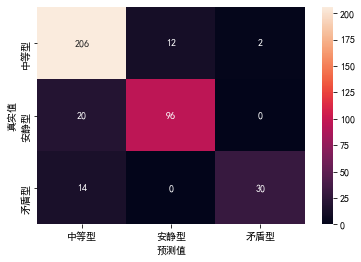

In [28]:
## 计算混淆矩阵并且可视化
cm = confusion_matrix(train_target,train_targe_predict)
sns.heatmap(cm,annot = True,fmt = "d",
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.ylabel("真实值")
plt.xlabel("预测值")
plt.show()

In [34]:
import sklearn.metrics as metrics
print("决策树准确度:")
print(metrics.classification_report(y_test,test_est))


决策树准确度:
              precision    recall  f1-score   support

           0       0.63      0.80      0.70        71
           1       0.43      0.31      0.36        29
           2       0.00      0.00      0.00        14

    accuracy                           0.58       114
   macro avg       0.35      0.37      0.35       114
weighted avg       0.50      0.58      0.53       114

